In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import backend as K
from sklearn import metrics
from sklearn import metrics
from sklearn.model_selection import cross_validate
from keras.wrappers.scikit_learn import KerasRegressor
import statistics as s
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [3]:
# reading the file
def reading_file(path,columns):
    df=pd.read_csv(path)
    df.columns=columns
    return df

In [4]:
#data preprocessing
def data_preprocessing(df):
    values={}
    #converting the value to float 
    df=df.astype(float)
    #finding the mean of each column and storing the values in the dic
    for i in df.columns:
        mean=df[i].mean()
        values[i]=mean 
    #replacing the Nan value by mean
    df=df.fillna(value=values)
    return df

In [5]:
# spliting dataset into training and testing
def spliting(df):
    number_of_parameter=len(df.columns)
    dataset=df.values
    y=dataset[:,0]
    x=dataset[:,0:number_of_parameter]
    x.shape[1] 
    return x,y

In [6]:
# create model
def model_perceptron(input_dim=None):
    model= Sequential()
    # perceptron
    model.add(Dense(units=1,input_dim=input_dim,activation='relu'))
    #setting the optimizer value
    keras.optimizers.Adam(lr=0.0001,decay=0.00001)
    #compiling the model
    model.compile(optimizer='adam', loss="mean_absolute_error")
    return model

In [7]:
#creating model
def model_neural(input_dim=None):
    model= Sequential()
    #hidden layer
    model.add(Dense(units=input_dim,input_dim=input_dim,activation='relu'))
    # output layer
    model.add(Dense(1))
    # setting the learning rate and decay value
    keras.optimizers.Adam(lr=0.0001,decay=0.00001)
    #compiling the model
    model.compile(optimizer='adam', loss="mean_absolute_error")
    return model

In [8]:
#creating model
def model_neural_xl(input_dim=None):
    model= Sequential()
    #hidden layer
    model.add(Dense(units=5,input_dim=input_dim))
    #2nd hidden layer
    model.add(Dense(units=3,activation='relu'))
    # output layer
    model.add(Dense(1))
    # setting the learning rate and decay value
    keras.optimizers.Adam(lr=0.0001,decay=0.00001)
    #compiling the model
    model.compile(optimizer='adam', loss="mean_absolute_error")
    return model

In [17]:
def forward_selection_perceptron(x,y):
    # declaring value
    r_square_list=[]
    adjusted_r_squared_list=[]
    cross_rsquare_list=[]
    r_square=0
    adjusted_r_squared=0
    x1=x
    f=[] 
    # for selection of n feature
    for i in range (x1.shape[1]):
        max=0
        #for selection of n feature
        for j in range (x1.shape[1]):
            # selecting that are not been selected
            if (j not in f):
                # taking the required column value
                x_sel=x1[:,j]
                # Taking the value of the feature that are already been selected
                x_done=x1[:,f]
                # joining both the numpy array
                x_sel=np.concatenate((x_done,x_sel[:,None]),axis=1)
                # creating model
                model=model_perceptron(input_dim=x_sel.shape[1])
                # Trainig the model
                result=model.fit(x_sel,y,epochs=100,batch_size=5)
                # calculating the y pred
                y_pred=model.predict(x_sel)
                # calculating R_square and adjusted R_square
                r_square=metrics.r2_score(y,y_pred)
                adjusted_r_squared=1 - (1-r_square)*(len(y)-1)/(len(y)-x.shape[1]-1)
                # checking wheather a particular feature is the best or not
                if(max<r_square):
                    max=r_square
                    index=j
        f.append(index)
        # Creation of model for cross_validation
        model = KerasRegressor(build_fn=model_neural,input_dim=x[:,f].shape[1],epochs=100, batch_size=5, verbose=0)
        # calculating rsqaure cv
        c_r=cross_val_score(model, x1[:,f], y, cv=10, scoring='r2')
        # storing value for rsquare_cv, adjusted_rsquare, rsquare
        cross_rsquare_list.append(s.mean(c_r))
        r_square_list.append(r_square)
        adjusted_r_squared_list.append(adjusted_r_squared)
    return r_square_list,adjusted_r_squared_list,cross_rsquare_list

In [18]:
def forward_selection_neural(x,y):
    # declaring value
    r_square_list=[]
    adjusted_r_squared_list=[]
    cross_rsquare_list=[]
    r_square=0
    adjusted_r_squared=0
    x1=x
    f=[] 
    # for selection of n feature
    for i in range (x1.shape[1]):
        max=0
        #for selection of n feature
        for j in range (x1.shape[1]):
            # selecting that are not been selected
            if (j not in f):
                # taking the required column value
                x_sel=x1[:,j]
                # Taking the value of the feature that are already been selected
                x_done=x1[:,f]
                # joining both the numpy array
                x_sel=np.concatenate((x_done,x_sel[:,None]),axis=1)
                # creating model
                model=model_neural(input_dim=x_sel.shape[1])
                # Trainig the model
                result=model.fit(x_sel,y,epochs=100,batch_size=5)
                # calculating the y pred
                y_pred=model.predict(x_sel)
                # calculating R_square and adjusted R_square
                r_square=metrics.r2_score(y,y_pred)
                adjusted_r_squared=1 - (1-r_square)*(len(y)-1)/(len(y)-x.shape[1]-1)
                # checking wheather a particular feature is the best or not
                if(max<r_square):
                    max=r_square
                    index=j
        f.append(index)
        # Creation of model for cross_validation
        model = KerasRegressor(build_fn=model_neural,input_dim=x[:,f].shape[1],epochs=100, batch_size=5, verbose=0)
        # calculating rsqaure cv
        c_r=cross_val_score(model, x1[:,f], y, cv=10, scoring='r2')
        # storing value for rsquare_cv, adjusted_rsquare, rsquare
        cross_rsquare_list.append(s.mean(c_r))
        r_square_list.append(r_square)
        adjusted_r_squared_list.append(adjusted_r_squared)
    return r_square_list,adjusted_r_squared_list,cross_rsquare_list

In [11]:
# plot R^2
def plot_graph(rsquare,adjusted_rsquare,rsquare_cv):    
    plt.plot(rsquare,color='red')
    plt.plot(rsquare_cv,color='green')
    plt.plot(adjusted_rsquare,color='blue')
    plt.title("rsquare, adjusted, r_cv")
    plt.legend()
    plt.show()

In [12]:
# making a user defined program
def auto_mpg():
    filename="auto-mpg.csv"
    columns=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
    return filename,columns
    
def gps():
    filename="gps.csv"
    columns=["id","id_android","speed","time","distance","rating","rating_bus","rating_weather","car_or_bus"]
    return filename,columns
    
def real_estate():
    filename="real_estate.csv"
    columns=["X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude","Y house price of unit area"]
    return filename,columns
    
def Concrete_Data():
    filename="Concrete_Data.csv"
    columns=["Cement", "Blast furnace slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age", "Concrete compressive strength"]
    return filename,columns

def Admission_Predict():
    filename="Admission_Predict.csv"
    columns=["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research","Chance of Admit "]
    return filename,columns

def computer_hardware():
    filename="computerhardware.csv"
    columns=["erp","myct","mmin","mmax","cach", "chmin","chmax","prp"]
    return filename,columns

def beijing_pm():
    filename="beijing_pm.csv"
    columns=["pm2.5","year","month","day","hour","DEWP","TEMP","PRES","lws","ls","lr"]
    return filename,columns

def wine():
    filename="wine.csv"
    columns=["quality","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
    return filename,columns

def red_wine():
    filename="red_wine.csv"
    columns=["quality","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
    return filename,columns

def yachtdata():
    filename="yachtdata.csv"
    columns=["Longitudnal_position"," Prismatic_coef"," Length_displacement"," Beam_draught"," length_beam"," froude_number"," residuary_resistance"]
    return filename,columns

In [13]:
# choice function
def choice(argument):
    options={
            1:auto_mpg(),
            2:gps(),
            3:real_estate(),
            4:Concrete_Data(),
            5:Admission_Predict(),
            6:computer_hardware(),
            7:beijing_pm(),
            8:wine(),
            9:red_wine(),
            10:yachtdata()}
    filename,columns=options.get(argument,"invalid input")
    return filename,columns


::::::::::::::::::::::::::::::

 enter path of dataset  =/home/anant/data-science_2/Project_2_keras_implementation/dataset/

::::::::::::::::::::::::::::::

::::::Choose the dataset::::::

 1. auto-mpg 
 2. GPS Trajectories  
 3. Real estate valuation data set 
 4. Concrete Data 
 5. Admission Predict 
 6. Computer Hardware 
 7. Beijing PM 
 8. White Wine 
 9. Red Wine 
 10. Yatch Data 
 11. Anyother dataset

::::::::::::::::::::::::::::::

 enter your choice =2

::::::::::::::::::::::::::::::

choose the model

 1. perceptron 
 2. Neural-net-3-layer 
 3. Neural-net-x-layer
enter the choice=1
Epoch 1/100
162/162 [==============================] - 5s 31ms/step - loss: 900.0554
Epoch 2/100
162/162 [==============================] - 0s 796us/step - loss: 445.5314
Epoch 3/100
162/162 [==============================] - 0s 704us/step - loss: 57.2254
Epoch 4/100
162/162 [==============================] - 0s 723us/step - loss: 5.7656
Epoch 5/100
162/162 [==============================] - 0s 6

No handles with labels found to put in legend.


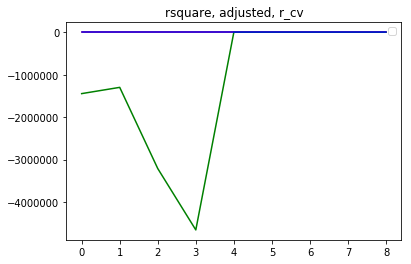

In [19]:
# main function        
def main():
    print("\n::::::::::::::::::::::::::::::")
    path= input("\n enter path of dataset  =")
    print("\n::::::::::::::::::::::::::::::\n")
    print("::::::Choose the dataset::::::")
    print("\n 1. auto-mpg \n 2. GPS Trajectories  \n 3. Real estate valuation data set \n 4. Concrete Data \n 5. Admission Predict \n 6. Computer Hardware \n 7. Beijing PM \n 8. White Wine \n 9. Red Wine \n 10. Yatch Data \n 11. Anyother dataset")
    print("\n::::::::::::::::::::::::::::::")
    choice_value= int(input("\n enter your choice ="))
    print("\n::::::::::::::::::::::::::::::\n")
    if(choice_value>0 and choice_value<11):
        filename,columns=choice(choice_value)
    if(choice_value==11):
        filename=input("enter the filename")
        columns=input("Enter column name and separate it with comma(,)")
        columns=columns.split(',')
    if(choice_value<=0 or choice_value>=12):
        print("************invalid choice**************")
    
    #full path of dataset
    path=path+filename
    #reading file and putting into dataframe
    dataframe=reading_file(path,columns)
    #pre processing
    dataframe=data_preprocessing(dataframe)
    #spliting the dataset into predictors and target
    x,y=spliting(dataframe)
    #model selection and implementation
    print("choose the model")
    print("\n 1. perceptron \n 2. Neural-net-3-layer \n 3. Neural-net-x-layer")
    model_choice=int(input("enter the choice="))
    if(model_choice==1):
        rsqaure,adjusted,cross=forward_selection_perceptron(x,y)
    if(model_choice==2):
        rsqaure,adjusted,cross=forward_selection_neural(x,y)
    if(model_choice==3):
        rsqaure,adjusted,cross=forward_selection_neural_xl(x,y)
    if(model_choice<=0 or model_choice>=4):
        print("************invalid choice**************")
    #Plotting graph of model
    plot_graph(rsqaure,adjusted,cross)
    
#path=/home/anant/data-science_2/Project_2_keras_implementation/dataset/

        
if __name__ == '__main__':
    main()